In [3]:
import pandas as pd
import numpy as np
import os
import json
import glob
import matplotlib.pyplot as plt

DATAPATH="C:\\Users\Administrator\Desktop\IdsLab\任务\SchedulerSystem\Code\data/*.json"
titles=glob.glob(DATAPATH)
    'dataPath':"C:\\Users\Administrator\Desktop\IdsLab\任务\SchedulerSystem\Code\data/*.json"
print(titles)

['C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\SchedulerSystem\\Code\\data\\data_1.json', 'C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\SchedulerSystem\\Code\\data\\data_2.json', 'C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\SchedulerSystem\\Code\\data\\data_3.json', 'C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\SchedulerSystem\\Code\\data\\data_4.json', 'C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\SchedulerSystem\\Code\\data\\data_5.json', 'C:\\Users\\Administrator\\Desktop\\IdsLab\\任务\\SchedulerSystem\\Code\\data\\data_6.json']


In [4]:
#read data(json format)
dfs=[]      #only complete
sum=0
for title in titles:
    if title.endswith('.json'):
        with open(title,'r') as f:
            json_data = json.load(f)
            dft = pd.DataFrame(json_data)
            dft.reset_index(inplace=True)
            dft=dft[dft['status.phase']=='Completed']
            sum+=len(dft)
            dft = dft.drop('index',axis=1)
            dfs.append(dft)

In [5]:
dfs=pd.concat([dfs[i] for i in range(len(dfs))])
assert sum==len(dfs)
print(len(dfs))

14324


In [7]:
a=[pd.DataFrame([1,2,3,4,5]) for i in range(6)]
print()

KeyboardInterrupt: 

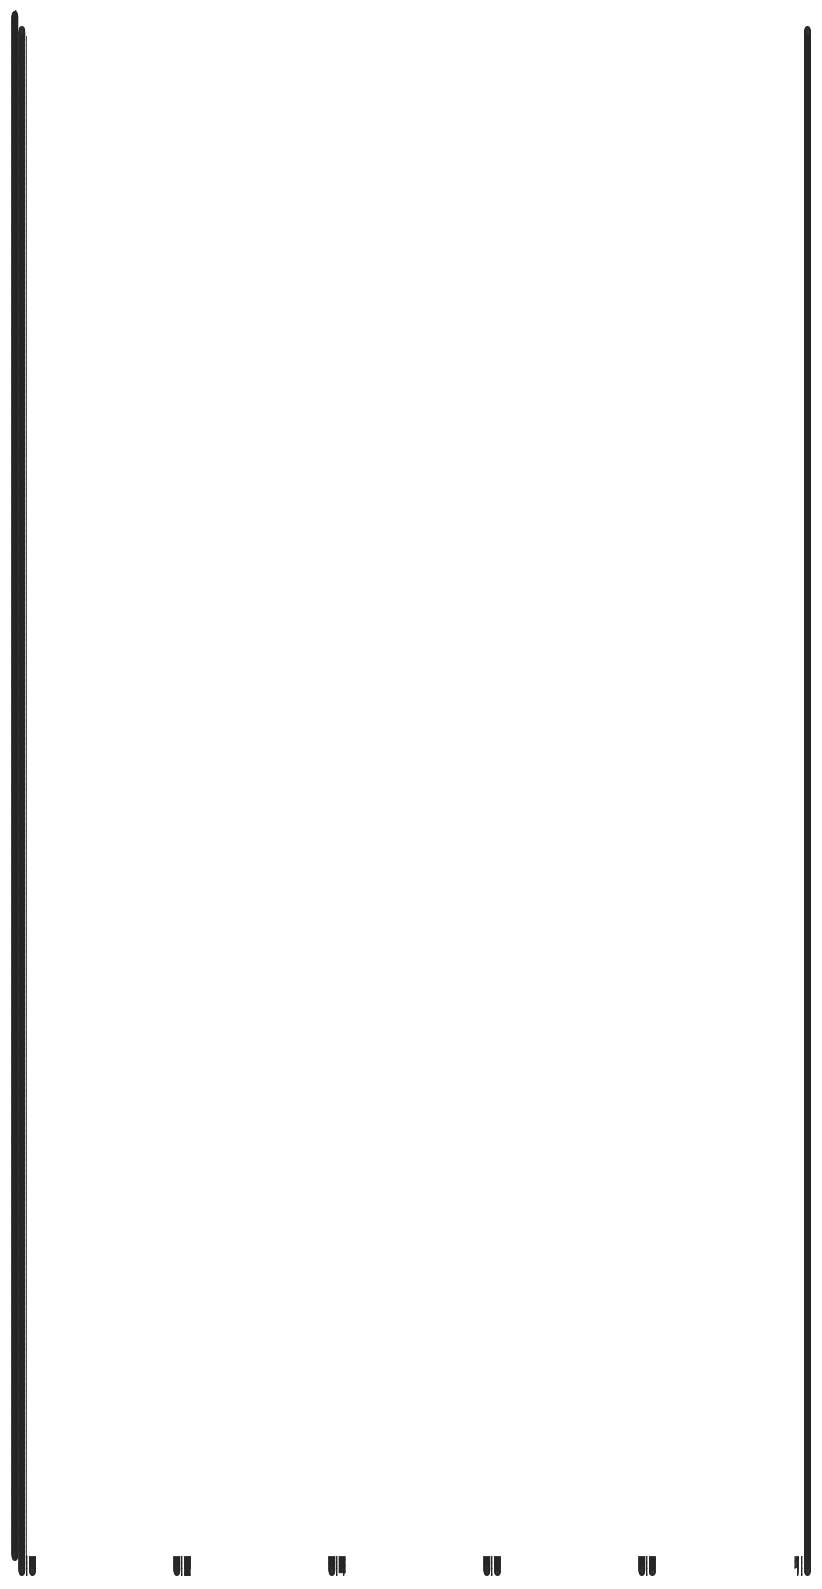

In [8]:
fig, axs = plt.subplots(len(dft),figsize=(10,20))

for i,data in enumerate(dft):
    status_counts = data['status.phase'].value_counts()
    bars = axs[i].bar(status_counts.index,status_counts.values)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Status')  
    axs[i].set_ylabel('Count')

    for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x()+ bar.get_width()/2, yval +0.05, yval, ha= 'center', va='bottom')
plt.tight_layout()
plt.show()